In [50]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [51]:
df = pd.read_csv('/home/roy/regresion_logistica/data/data.csv')

In [52]:
df #  Diagnosis (M = malignant, B = benign)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [53]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [54]:
df = df.drop(columns='Unnamed: 32')
df.isnull().sum().sum()

0

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.info()# muestra la informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [57]:
df.diagnosis = df.diagnosis.replace(["M", "B"], [1, 0]) # codificacion

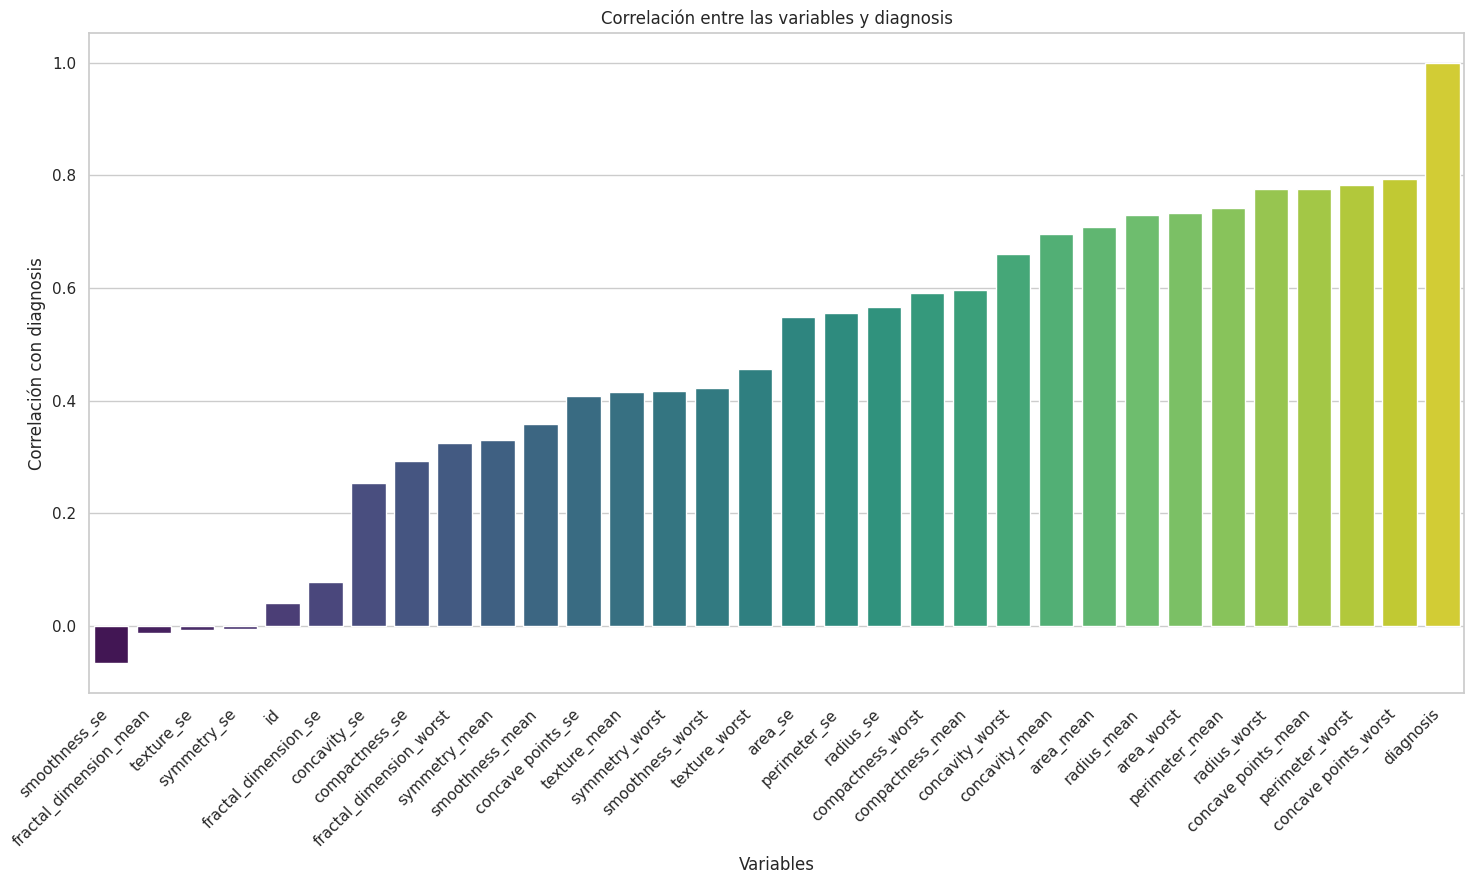

In [58]:
# Calculamos la matriz de correlación no hacemos heat map por ser muchas variables
corr_matrix = df.corr()

# Ordenamos la correlación respecto a la columna 'Churn' en orden ascendente
sorted_corr_churn = corr_matrix['diagnosis'].sort_values()

# Configuramos el estilo de Seaborn (opcional, solo para mejorar la estética)
sns.set(style="whitegrid")

# Creamos la gráfica de barras utilizando Seaborn
plt.figure(figsize=(15, 9))  # Aumentamos el tamaño de la figura
ax = sns.barplot(x=sorted_corr_churn.index, y=sorted_corr_churn.values, palette="viridis")

# Añadimos etiquetas y títulos
plt.xlabel('Variables')
plt.ylabel('Correlación con diagnosis')
plt.title('Correlación entre las variables y diagnosis')

# Rotamos las etiquetas del eje x para que se lean mejor
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos la gráfica
plt.tight_layout()  # Para asegurarnos de que todo se muestre correctamente
plt.show()

In [59]:
sorted_index = corr_matrix['diagnosis'].sort_values().index
df_sorted_corr = pd.DataFrame({'Variable': sorted_index, 'Correlacion con diagnosis': corr_matrix['diagnosis'][sorted_index]})
print(df_sorted_corr)

                                        Variable  Correlacion con diagnosis
smoothness_se                      smoothness_se                  -0.067016
fractal_dimension_mean    fractal_dimension_mean                  -0.012838
texture_se                            texture_se                  -0.008303
symmetry_se                          symmetry_se                  -0.006522
id                                            id                   0.039769
fractal_dimension_se        fractal_dimension_se                   0.077972
concavity_se                        concavity_se                   0.253730
compactness_se                    compactness_se                   0.292999
fractal_dimension_worst  fractal_dimension_worst                   0.323872
symmetry_mean                      symmetry_mean                   0.330499
smoothness_mean                  smoothness_mean                   0.358560
concave points_se              concave points_se                   0.408042
texture_mean

eliminamos columnas que sean menos irrelevantes

In [60]:

df_processed = df.copy()
columns_to_drop = ['smoothness_se','fractal_dimension_mean','texture_se','symmetry_se','id','fractal_dimension_se']
df_processed=df_processed.drop(columns=columns_to_drop)
df_processed

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


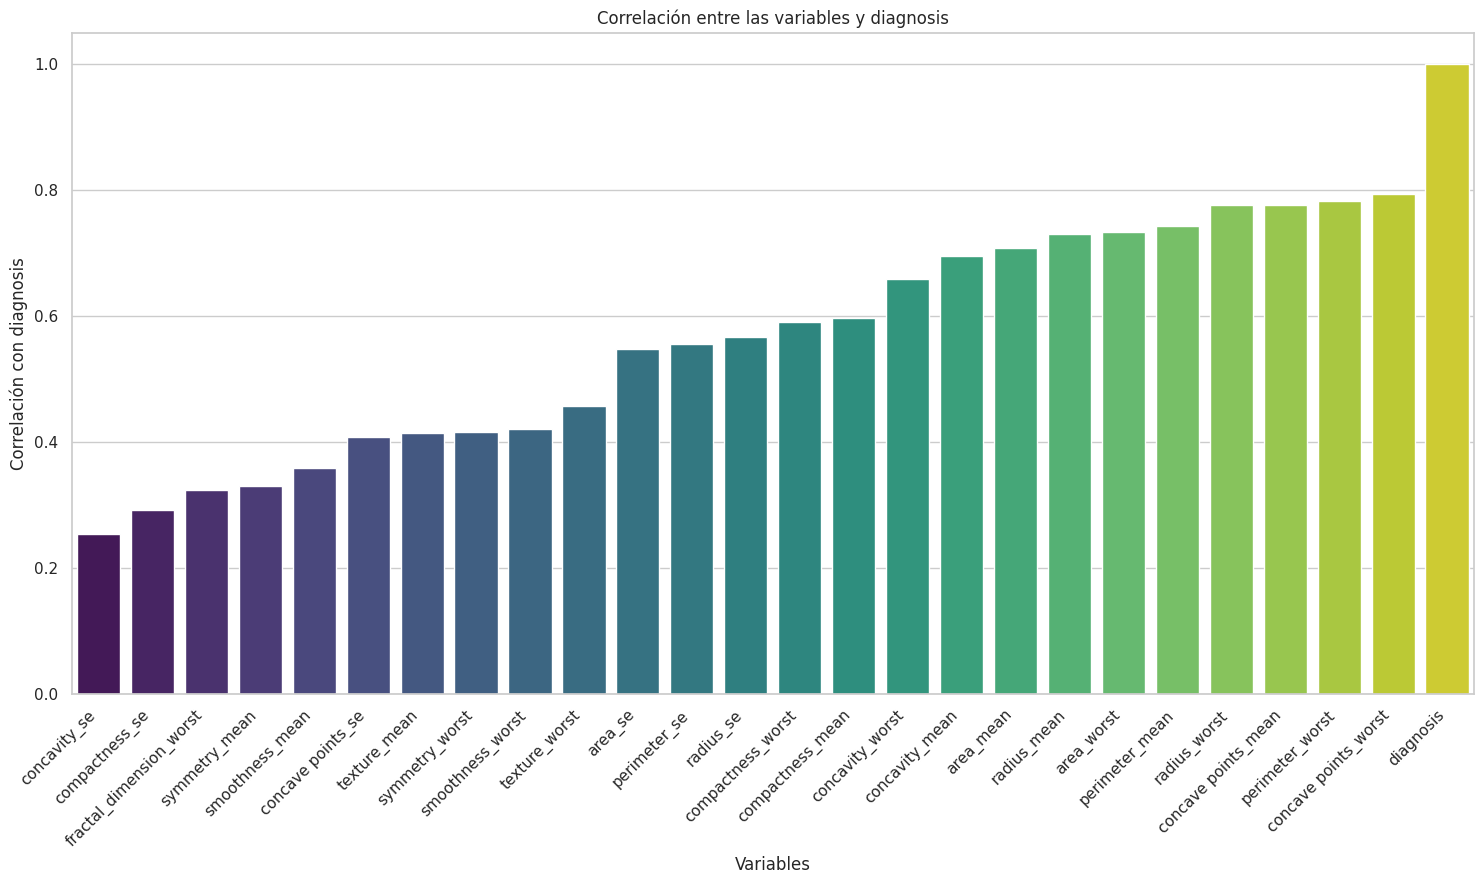

In [61]:
# Calculamos la matriz de correlación no hacemos heat map por ser muchas variables
corr_matrix = df_processed.corr()

# Ordenamos la correlación respecto a la columna 'Churn' en orden ascendente
sorted_corr_churn = corr_matrix['diagnosis'].sort_values()

# Configuramos el estilo de Seaborn (opcional, solo para mejorar la estética)
sns.set(style="whitegrid")

# Creamos la gráfica de barras utilizando Seaborn
plt.figure(figsize=(15, 9))  # Aumentamos el tamaño de la figura
ax = sns.barplot(x=sorted_corr_churn.index, y=sorted_corr_churn.values, palette="viridis")

# Añadimos etiquetas y títulos
plt.xlabel('Variables')
plt.ylabel('Correlación con diagnosis')
plt.title('Correlación entre las variables y diagnosis')

# Rotamos las etiquetas del eje x para que se lean mejor
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos la gráfica
plt.tight_layout()  # Para asegurarnos de que todo se muestre correctamente
plt.show()

## Escalabilidad de los datos 

In [62]:
scaler = MinMaxScaler() 
df_processing_scaled = scaler.fit_transform(df_processed) 

In [63]:
df_data_processing_scaled = pd.DataFrame(df_processing_scaled) # convirtiendo en dataframe
df_data_processing_scaled.columns=df_processed.columns# estableciendo los nombres de las variables que se borraron
df_data_processing_scaled # listo 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


## Entrenamiento del modelo

In [64]:
X = df_data_processing_scaled.drop("diagnosis",axis=1)
y = df_data_processing_scaled['diagnosis'].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42,shuffle=True)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)

In [67]:
from sklearn import metrics # evaluacion del entrenamiento 
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.9736842105263158


## Evaluacion 

In [68]:
from sklearn.metrics import classification_report
predicciones = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        71
         1.0       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [69]:
model.predict_proba(X_test)

array([[8.22918367e-01, 1.77081633e-01],
       [3.44044587e-02, 9.65595541e-01],
       [1.81384905e-01, 8.18615095e-01],
       [9.34909592e-01, 6.50904079e-02],
       [9.79344261e-01, 2.06557388e-02],
       [7.58703135e-05, 9.99924130e-01],
       [7.25857903e-04, 9.99274142e-01],
       [2.93888340e-01, 7.06111660e-01],
       [5.17879803e-01, 4.82120197e-01],
       [9.61477036e-01, 3.85229639e-02],
       [8.75325564e-01, 1.24674436e-01],
       [2.69281366e-01, 7.30718634e-01],
       [9.18775534e-01, 8.12244657e-02],
       [2.97746257e-01, 7.02253743e-01],
       [9.61202128e-01, 3.87978721e-02],
       [1.54018619e-02, 9.84598138e-01],
       [9.49751120e-01, 5.02488798e-02],
       [9.92653278e-01, 7.34672231e-03],
       [9.98098195e-01, 1.90180494e-03],
       [5.57557561e-03, 9.94424424e-01],
       [7.30145703e-01, 2.69854297e-01],
       [9.25539757e-01, 7.44602433e-02],
       [4.95238640e-04, 9.99504761e-01],
       [9.90581168e-01, 9.41883164e-03],
       [9.612325

In [70]:
model.coef_

array([[ 1.84787473,  1.69987382,  1.80073567,  1.55435323,  0.54255063,
         0.2163895 ,  1.19736431,  2.01838074,  0.36986524,  1.10503089,
         0.83741157,  0.74891826, -0.83961976, -0.42001389,  0.07503016,
         2.27501313,  2.32479687,  2.05635141,  1.62851888,  1.38301682,
         0.74079254,  1.27781215,  2.49996902,  1.3538814 ,  0.13007178]])

In [71]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Top 10 Coeficientes del Modelo mas influyentes')

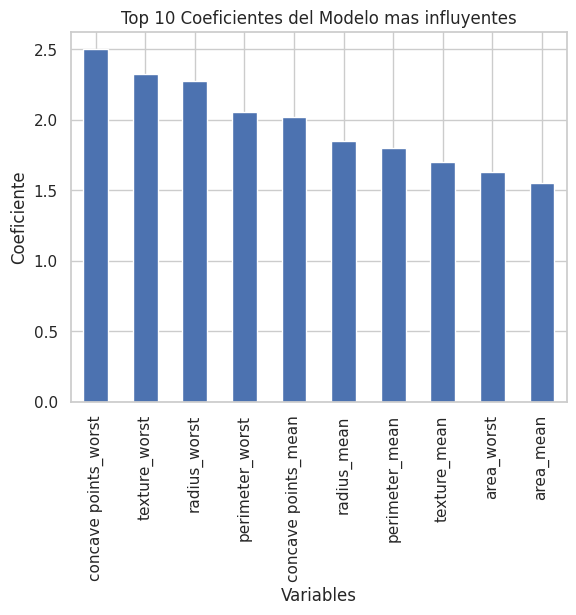

In [78]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))
plt.xlabel('Variables')
plt.ylabel('Coeficiente')
plt.title('Top 10 Coeficientes del Modelo mas influyentes')

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Top 10 Coeficientes del Modelo menos influyentes')

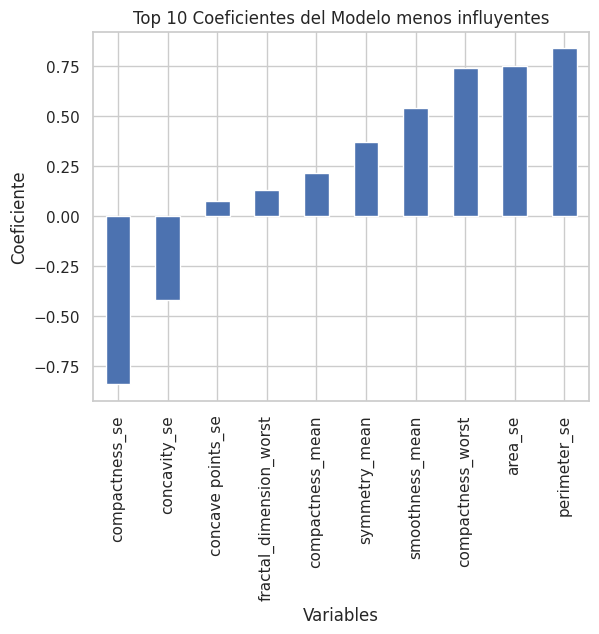

In [79]:
print(weights.sort_values(ascending=True)[:10].plot(kind='bar'))
plt.xlabel('Variables')
plt.ylabel('Coeficiente')
plt.title('Top 10 Coeficientes del Modelo menos influyentes')

<Figure size 1100x1100 with 0 Axes>

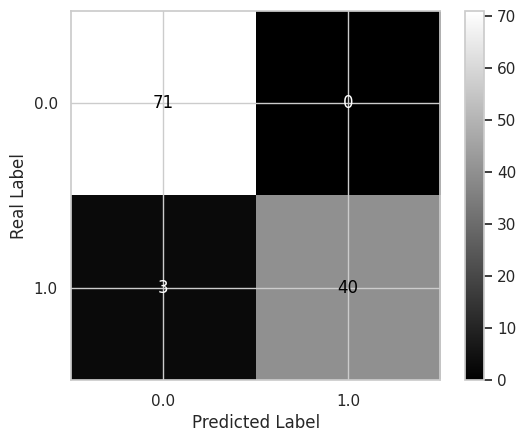

In [74]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test,prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=model.classes_)
disp.plot(cmap = 'gray')
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')
plt.show()


## Regularización

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos usaremos la tecnica L1 lasso

# L1

Reduce la complejidad a través de eliminación de features que no aportan demasiado al modelo.
Penaliza a los features que aporta poca información volviéndolos cero, eliminado el ruido que producen en el modelo.

C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [94]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.6)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.9473684210526315

Text(0.5, 19.049999999999997, 'Predicted Label')

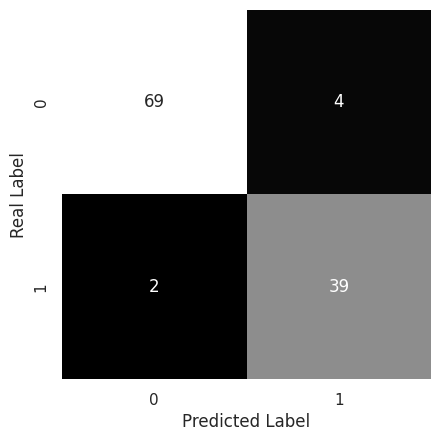

In [95]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')

<AxesSubplot:>

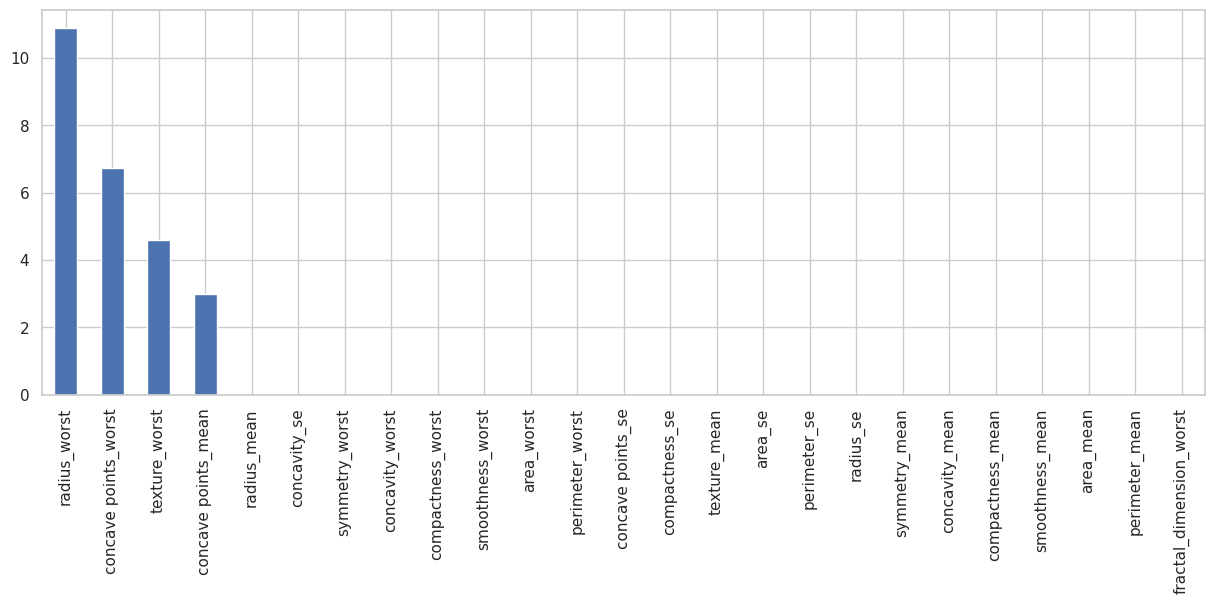

In [96]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

In [97]:
weights[weights==0] # parametros que se convirtieron a 0 

radius_mean                0.0
concavity_se               0.0
symmetry_worst             0.0
concavity_worst            0.0
compactness_worst          0.0
smoothness_worst           0.0
area_worst                 0.0
perimeter_worst            0.0
concave points_se          0.0
compactness_se             0.0
texture_mean               0.0
area_se                    0.0
perimeter_se               0.0
radius_se                  0.0
symmetry_mean              0.0
concavity_mean             0.0
compactness_mean           0.0
smoothness_mean            0.0
area_mean                  0.0
perimeter_mean             0.0
fractal_dimension_worst    0.0
dtype: float64